In [5]:
# Load Data
import pandas as pd

# Load dataset
data = pd.read_csv('flame_current.csv')

# Show first few rows
data.head()


,Flame Current (uA),Flame Level
0,89.93,No Flame
1,52.30,No Flame
2,19.55,Mid Flame
3,17.11,Mid Flame
4,17.11,Mid Flame


In [6]:
# Clean the Data
import pandas as pd
import re

# STEP 1: Load the raw CSV
raw_data = pd.read_csv("flame_current.csv", header=None)

# STEP 2: Fix missing headers if needed
if raw_data.shape[1] == 1:
    # Data is corrupted; try splitting on tab, space, or mixed
    raw_data = raw_data[0].str.extract(r'([\d.]+)[,\t ]+([a-zA-Z ]+)')

# Rename columns
raw_data.columns = ['Flame (microampere)', 'Flame Level']

# STEP 3: Remove spaces and non-letter characters from labels
raw_data['Flame Level'] = raw_data['Flame Level'].str.strip()
raw_data['Flame Level'] = raw_data['Flame Level'].str.replace(r'[^a-zA-Z ]', '', regex=True)
raw_data['Flame Level'] = raw_data['Flame Level'].str.replace(r'\s+', ' ', regex=True)

# STEP 4: Remove junk labels (typos)
valid_labels = ['No Flame', 'Low Flame', 'Mid Flame', 'High Flame']
clean_data = raw_data[raw_data['Flame Level'].isin(valid_labels)]

# STEP 5: Convert the current to float
clean_data.loc[:, 'Flame (microampere)'] = pd.to_numeric(clean_data['Flame (microampere)'], errors='coerce')

# Drop rows with missing or invalid data
clean_data = clean_data.dropna()

# Show cleaned data
print("Cleaned rows:", len(clean_data))
print(clean_data.head())

# STEP 6: Save to a new clean CSV
clean_data.to_csv("Flame_Data.csv", index=False)
print("Saved Flame_Data.csv!")


Cleaned rows: 1973
  Flame (microampere) Flame Level
1               89.93    No Flame
2                52.3    No Flame
3               19.55   Mid Flame
4               17.11   Mid Flame
5               17.11   Mid Flame
Saved Flame_Data.csv!


In [7]:
data = pd.read_csv("Flame_Data.csv")
print(data)

      Flame (microampere) Flame Level
0                   89.93    No Flame
1                   52.30    No Flame
2                   19.55   Mid Flame
3                   17.11   Mid Flame
4                   17.11   Mid Flame
...                   ...         ...
1968                13.20  High Flame
1969                13.69  High Flame
1970                13.69  High Flame
1971                13.69  High Flame
1972                15.15   Mid Flame

[1973 rows x 2 columns]


Flame Levels: ['No Flame' 'Mid Flame' 'High Flame' 'Low Flame']


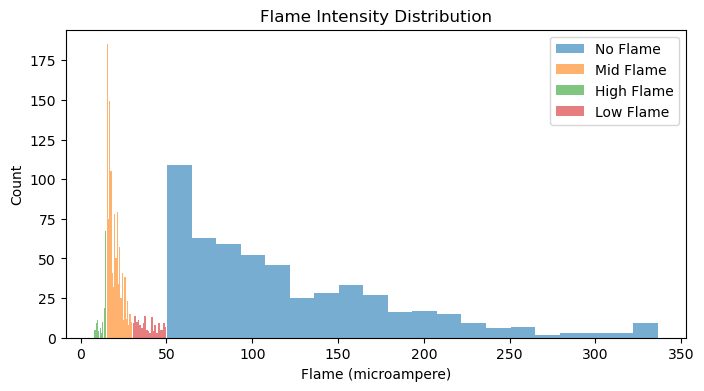

In [8]:
# Visualize and Check Data
import matplotlib.pyplot as plt

# Check unique labels
print("Flame Levels:", data['Flame Level'].unique())

# Plot
plt.figure(figsize=(8,4))
for level in data['Flame Level'].unique():
    subset = data[data['Flame Level'] == level]
    plt.hist(subset['Flame (microampere)'], label=level, bins=20, alpha=0.6)
plt.xlabel("Flame (microampere)")
plt.ylabel("Count")
plt.legend()
plt.title("Flame Intensity Distribution")
plt.show()


In [10]:
# Preprocess & Label Encode
custom_mapping = {
    'No Flame': 0,
    'Low Flame': 1,
    'Mid Flame': 2,
    'High Flame': 3
}

# Apply the mapping
data['Label'] = data['Flame Level'].map(custom_mapping)

# Features and target
X = data[['Flame (microampere)']]
y = data['Label']

# View encoding
print("Label encoding used:", custom_mapping)

Label encoding used: {'No Flame': 0, 'Low Flame': 1, 'Mid Flame': 2, 'High Flame': 3}


In [16]:
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Flame Level'])

# Features and target
X = data[['Flame (microampere)']]
y = data['Label']


In [17]:
# Hyperparameter Tuning and Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create base model
dt = DecisionTreeClassifier()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model from search
best_model = grid_search.best_estimator_

# Predict and Evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy * 100:.2f}%")

target_names = ['No Flame', 'Low Flame', 'Mid Flame', 'High Flame']
print(classification_report(y_test, y_pred, target_names=target_names))


Tuned Model Accuracy: 100.00%
              precision    recall  f1-score   support

    No Flame       1.00      1.00      1.00        41
   Low Flame       1.00      1.00      1.00        27
   Mid Flame       1.00      1.00      1.00       218
  High Flame       1.00      1.00      1.00       109

    accuracy                           1.00       395
   macro avg       1.00      1.00      1.00       395
weighted avg       1.00      1.00      1.00       395



In [18]:
# Save the Model
import joblib

# Save model and label encoder
joblib.dump(model, 'flame_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model saved!")


Model saved!


In [19]:
# Test on a sample microampere reading
import pandas as pd

sample = pd.DataFrame([[22.5]], columns=['Flame (microampere)'])
pred = model.predict(sample)

# Decode using custom mapping
inverse_mapping = {v: k for k, v in custom_mapping.items()}
label = inverse_mapping[pred[0]]

print(f"Prediction for {sample.iloc[0,0]} µA → {label}")

Prediction for 22.5 µA → Mid Flame


In [24]:
# No need of this Block

# Convert your dataset into TensorFlow format
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load clean data
data = pd.read_csv("Flame_Data.csv")

# Custom label mapping
label_map = {'No Flame': 0, 'Low Flame': 1, 'Mid Flame': 2, 'High Flame': 3}
data['Label'] = data['Flame Level'].map(label_map)

X = data[['Flame (microampere)']].values
y = data['Label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [25]:
# No need of this Block

# Build a Small Neural Network (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build model
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
 

C:\Users\misti\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4799 - loss: 8.7332 - val_accuracy: 0.2835 - val_loss: 2.7958
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4482 - loss: 2.4925 - val_accuracy: 0.7316 - val_loss: 1.8418
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7944 - loss: 1.6304 - val_accuracy: 0.7823 - val_loss: 1.4334
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8098 - loss: 1.3529 - val_accuracy: 0.7975 - val_loss: 1.2122
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8152 - loss: 1.1442 - val_accuracy: 0.7975 - val_loss: 1.0282
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.9998 - val_accuracy: 0.7975 - val_loss: 0.9006
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8127 - loss: 0.8517 - val_accuracy: 0.7975 - val_loss: 0.8390
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - loss: 0.7983 - val_accuracy: 0.7975 - val_loss

In [26]:
# No need of this Block

# Convert to TensorFlow Lite
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open("Flame_Classifier.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\misti\AppData\Local\Temp\tmp5vlxw0ms\assets


INFO:tensorflow:Assets written to: C:\Users\misti\AppData\Local\Temp\tmp5vlxw0ms\assets


Saved artifact at 'C:\Users\misti\AppData\Local\Temp\tmp5vlxw0ms'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2540992393296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2541001442128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2541001444816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2541001445776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2541001445008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2541001443856: TensorSpec(shape=(), dtype=tf.resource, name=None)
